In [1]:
import pandas as pd
import numpy as np

## Load speech file

In [2]:
# load data from pickle file
import pickle

pickle_in = open("speeches.pickle", "rb")
speech_df = pickle.load(pickle_in)

In [3]:
speech_df.head()

,type,speaker,date,speech
0,convention,Hillary Clinton,2016,Thank you all for the great convention that we...
1,convention,Robert Dole,1996,The folks in Hollywood would be happy to know ...
2,convention,George W. Bush,2000,"Thank you. Thank you for this honor. [,],Thank..."
3,convention,George W. Bush,2004,"When I said those words 4 years ago, none of u..."
4,convention,John McCain,2008,"Tonight, I have a privilege given few American..."


In [4]:
speech_text = speech_df['speech']

## VC and LDA

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [6]:
count_vectorizer = CountVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    token_pattern="\\b[a-z][a-z]+\\b"
)

In [7]:
count_vectorizer.fit(speech_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [8]:
counts = count_vectorizer.transform(speech_text)

In [9]:
from sklearn import decomposition

In [10]:
n_topics = 15

lda = decomposition.LatentDirichletAllocation(
    n_components=n_topics, 
    learning_method="online", 
    verbose=1, 
    max_iter=5, 
    n_jobs=-1
)

lda.fit(counts)

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=15, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [11]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [12]:
print_top_words(lda, count_vectorizer.get_feature_names(), 15)

Topic #0: people government world great new american america states nation shall country war united power time
Topic #1: people america government world american new great country states time president make war nation free
Topic #2: people government america great country new world time states make power know united american peace
Topic #3: people america country government american world president states great years shall time make work party
Topic #4: government states united congress united states people year country great public new time american war world
Topic #5: government people great country nation america world states power american new years free time united
Topic #6: government people world american country america years great year new congress united peace nation make
Topic #7: government people world great new country states years american time year united states america war peace
Topic #8: government people country nation america american new time world states peace sha

## TFIDF and NMF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [14]:
t_vectorizer = TfidfVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    token_pattern="\\b[a-z][a-z]+\\b"
)

t_vectorizer.fit(speech_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='\\b[a-z][a-z]+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [15]:
t_counts = t_vectorizer.transform(speech_text)

In [16]:
n_topics = 15

nmf = decomposition.NMF(
    n_components=n_topics,
    max_iter=5
)

nmf.fit(t_counts)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=5,
  n_components=15, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [17]:
print_top_words(nmf, t_vectorizer.get_feature_names(), 10)

Topic #0: states government united states united congress public year country subject general
Topic #1: america ve tonight people americans new jobs american children work
Topic #2: program economic government federal world congress year people national farm
Topic #3: people world government shall nation peace great freedom nations power
Topic #4: soviet oil energy world programs year billion percent new nuclear
Topic #5: applause ve america iraq let tonight people applause let congress budget
Topic #6: america world tonight americans let peace american united president united states
Topic #7: people government constitution president union federal shall congress energy states
Topic #8: congress vietnam tonight think years year commitments believe surtax kappel
Topic #9: interstate law business men corporations conditions work interstate commerce industrial man
Topic #10: party republican platform democratic democratic party republican party people nomination president convention
Topic 

## LDA - Max Features

In [18]:
count_vectorizer = CountVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    token_pattern="\\b[a-z][a-z]+\\b",
    max_df = 0.8
)

In [19]:
count_vectorizer.fit(speech_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [20]:
counts = count_vectorizer.transform(speech_text)

In [21]:
n_topics = 15

lda = decomposition.LatentDirichletAllocation(
    n_components=n_topics, 
    learning_method="online", 
    verbose=1, 
    max_iter=5, 
    n_jobs=-1
)

lda.fit(counts)

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=15, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=1)

In [22]:
print_top_words(lda, count_vectorizer.get_feature_names(), 15)

Topic #0: america shall president business necessary present service know foreign party better spirit need americans like
Topic #1: america party president know americans freedom say believe let man come want administration shall need
Topic #2: party america shall president let union believe know say foreign come americans administration political home
Topic #3: america president party let know believe americans shall say children freedom ve man want union
Topic #4: america americans let help know president security freedom economic tonight need today federal children tax
Topic #5: america party shall president let history believe business know freedom children americans home republican constitution
Topic #6: america president party let shall freedom say believe home today foreign americans know republican business
Topic #7: america party president shall freedom know americans believe say today let history liberty man come
Topic #8: shall america present act federal administration busi

## NMF - Max Features

In [23]:
# define lemmatization function


In [24]:
t_vectorizer = TfidfVectorizer(
    stop_words="english",
    token_pattern="\\b[a-z][a-z]+\\b",
    max_df=0.9,
    min_df=0.05
)

t_vectorizer.fit(speech_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.05,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='\\b[a-z][a-z]+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [25]:
t_counts = t_vectorizer.transform(speech_text)
t_counts.shape

(356, 5573)

In [26]:
n_topics = 30

nmf = decomposition.NMF(
    n_components=n_topics,
    max_iter=5
)

nmf.fit(t_counts)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=5,
  n_components=30, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [30]:
df_topics = pd.DataFrame(nmf.transform(t_counts))

In [31]:
df_topics

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.230658,0.000000,0.000000,0.000000,0.001961,0.000000,0.000000,0.053608,0.246716,...,0.000000,0.000000,0.004195,0.000000,0.000000,0.038416,0.000000,0.000000,0.000000,0.021739
1,0.000000,0.185486,0.000000,0.000747,0.000000,0.000000,0.000000,0.021171,0.104848,0.000000,...,0.000000,0.000000,0.020322,0.000000,0.007968,0.119612,0.000000,0.000000,0.042009,0.130956
2,0.000000,0.152105,0.000000,0.018276,0.000000,0.000000,0.000000,0.000000,0.059788,0.110462,...,0.003998,0.048200,0.000000,0.000000,0.095801,0.004508,0.000000,0.000000,0.000000,0.077333
3,0.000000,0.137813,0.000000,0.006237,0.000000,0.000000,0.000000,0.000000,0.019199,0.074988,...,0.000000,0.000000,0.000000,0.000000,0.010656,0.018260,0.000000,0.000000,0.003030,0.000000
4,0.000000,0.123389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040584,0.333674,...,0.012384,0.001973,0.000000,0.000000,0.020867,0.004736,0.000000,0.000000,0.000000,0.063630
5,0.000000,0.301242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009170,0.009015,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.037076,0.000000,0.000000,0.089474,0.080620
6,0.000000,0.201656,0.000000,0.000000,0.000000,0.031942,0.000000,0.000000,0.026019,0.028138,...,0.000000,0.000000,0.004624,0.000000,0.000000,0.130450,0.000000,0.000000,0.015589,0.013154
7,0.000000,0.000000,0.006714,0.097716,0.000000,0.060960,0.000000,0.000000,0.119199,0.000000,...,0.012289,0.000000,0.475649,0.000000,0.004665,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.008189,0.000000,0.085641,0.000000,0.000000,0.143830,0.000000,0.042967,0.246930,0.000000,...,0.000000,0.000000,0.042529,0.000000,0.000000,0.003712,0.000000,0.000000,0.000000,0.048798
9,0.000000,0.018997,0.034040,0.026878,0.000000,0.019083,0.000000,0.000000,0.200848,0.014029,...,0.000000,0.000000,0.065442,0.000000,0.167871,0.000000,0.000000,0.013263,0.000000,0.000000


In [27]:
rand_var = nmf.transform(t_counts)

In [28]:
rand_var[3]

array([0.        , 0.137813  , 0.        , 0.0062369 , 0.        ,
       0.        , 0.        , 0.        , 0.01919861, 0.07498752,
       0.        , 0.        , 0.05565966, 0.329324  , 0.        ,
       0.        , 0.        , 0.        , 0.00152221, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01065605,
       0.01825976, 0.        , 0.        , 0.00303027, 0.        ])

In [29]:
# greatest topic per document
np.argmax(rand_var, axis=1)

array([ 9,  1,  1, 13,  9,  1,  1, 22,  8,  8, 24,  3, 28,  8,  8,  8, 27,
       16, 22, 22, 17,  5, 20, 29, 29, 10,  8,  8, 15,  3,  8,  8,  1,  3,
        1,  1,  1, 18,  1,  9,  1,  8, 19,  1,  1,  8,  9,  1,  1,  1,  1,
        1,  1,  1,  9,  7,  4,  4, 20, 20, 27, 26, 26, 15, 26, 24, 29, 29,
       29, 22, 22,  1, 24, 24,  3, 13,  1, 24,  3, 21, 21,  3, 29,  1,  3,
       24,  3, 21,  3,  3, 24,  3, 24,  5,  3, 17, 16, 29,  7, 29,  7,  7,
       16, 29, 29,  7,  7,  7, 15,  7,  7,  7,  7,  7,  9, 19,  3, 14, 13,
       28,  3, 18, 28, 28,  7,  9, 28, 16,  4, 14, 14, 26, 26, 26, 26,  4,
        4,  4,  4,  4, 25,  4,  4,  1,  1,  9,  9,  1,  1,  9,  1,  6,  1,
        6,  6, 13, 13, 13, 13, 13, 12, 12, 12,  1,  1,  1,  1, 12, 12, 12,
        1,  1,  1,  6,  6,  6, 21,  1, 18, 18,  2, 28, 18,  9, 18, 18, 18,
       18, 18, 18,  1, 18, 19, 19, 19, 19, 21, 12, 12,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2, 28, 28, 28,  2,  2,  2,  2,  2, 24, 24, 24, 24,
        3, 24, 24, 24, 24

In [29]:
print_top_words(nmf, t_vectorizer.get_feature_names(), 10)

Topic #0: congress year department report secretary general subject service attention present
Topic #1: america tonight americans let jobs work world children years help
Topic #2: program economic world federal congress year programs farm development defense
Topic #3: world freedom free men democracy know life man human let
Topic #4: public commerce powers object debt spain present vessels citizens tribes
Topic #5: law business interstate public conditions ought tariff work corporations necessary
Topic #6: applause ve america let budget tonight congress iraq laughter year
Topic #7: constitution union shall citizens public state laws powers slavery constitutional
Topic #8: party republican democratic platform nomination president convention say campaign leadership
Topic #9: ve ll don soviet jobs oil know world didn fight
Topic #10: banks public treasury year notes currency gold silver expenditures circulation
Topic #11: mexico texas congress treaty mexican minister territory treasury ac

Topic #0: government admin  
congress year department report general secretary subject service attention present  

Topic #1: american people  
america tonight americans let jobs world work years children help  

Topic #2: econonmy  
economic program world federal congress farm development year programs military  

Topic #3: freedom  
world freedom free men let know life human man america  

Topic #4: noise  
public commerce powers object present spain effect debt objects vessels  

Topic #5: business  
business law interstate public ought conditions tariff work necessary corporations  

Topic #6: noise  
applause ve america let budget tonight congress iraq laughter year  

Topic #7: national unity  
constitution union shall citizens public laws powers state congress slavery  

Topic #8: campaign  
party republican platform democratic nomination convention republicans campaign say president  

Topic #9: noise  
ve ll soviet don jobs oil know world didn fight  

Topic #10: finance  
banks public treasury year currency notes credit congress banking recovery  

Topic #11: southwest territory  
mexico texas congress treaty mexican minister territory treasury act duties  

Topic #12: budget  
year billion budget help congress children tax percent health million  

Topic #13: war on terror  
iraq america terrorists terror terrorist freedom afghanistan world weapons americans  

Topic #14: noise  
bank general public paper subject notes means currency state indians  

Topic #15: noise  
shall oath america fighting japanese witnesses magistrate arrive men presence  

Topic #16: government action  
shall congress action measures session provision necessary regard executive public  

Topic #17: currency  
gold tariff silver notes cent products bonds cuba currency spain  

Topic #18: energy/econonmy  
energy programs federal percent oil spending congress strategic inflation years  

Topic #19: commitment  
vietnam tonight congress think years year commitments billion believe america  

Topic #20: enemy name-calling  
british enemy savages honorable prisoners savage rights public cruel proofs  

Topic #21: positive readiness  
freedom story seek men ready tasks help god courage hope  

Topic #22: spain territory  
spain treaty spanish islands catholic territory article cuba island state  

Topic #23: waterway issues  
british militia orders congress decrees harbors neutral vessels commerce ensuing  

Topic #24: achievement  
today generation learned journey let work achieve words democracy voices  

Topic #25: business  
democracy president business democratic reagan labor capital trade tariff laws  

Topic #26: treaty  
gentlemen commissioners france treaty philadelphia article french amity congress representatives  

Topic #27: people/society  
world continue agriculture civilization restoration citizens relationship economic want armaments  

Topic #28: nomination  
convention nomination measures foreign happiness public duties fellow nominated republican  

Topic #29: president  
president presidency friends office love prayers thank house family god

## TSNE

In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [36]:
doc_top = nmf.fit_transform(t_counts)

In [37]:
doc_max_top = np.argmax(doc_top, axis=1)

In [38]:
from sklearn.manifold import TSNE

doc_plot = TSNE(verbose=1, metric="cosine").fit_transform(doc_top)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 356 samples in 0.000s...
[t-SNE] Computed neighbors for 356 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 356 / 356
[t-SNE] Mean sigma: 0.357513
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.598049
[t-SNE] Error after 1000 iterations: 0.432663


In [39]:
doc_plot.shape

(356, 2)

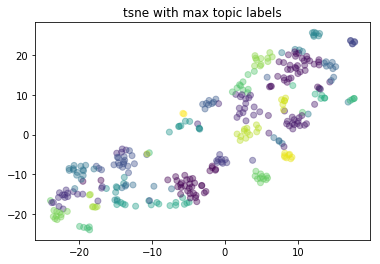

In [40]:
plt.scatter(doc_plot[:,0],doc_plot[:,1], c=doc_max_top, alpha=.4)
plt.title("tsne with max topic labels");
# plt.savefig("tsne w cosine.pdf")
cmap=plt.cm.get_cmap('tab20_r', 30)